# Top-down Renderer

[![Click and Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/metadriverse/metaurban/blob/main/documentation/source/top_down_render.ipynb)


2D Top-down renderer is widely used in this documentation for rendering the results, as it is lightweight and can run on any platforms without GPU requirement. And the simulation results are exactly the same using either 3D renderer or top-down renderer.

## Lifetime
You are free to launch this renderer at any timestep by calling `env.render(mode="topdown")`. The renderer will be created and work until the `env.reset()` is called. It will shutdown the `top_down_renderer` and destroy it. Thus the lifetime of a renderer is the period between calling `env.render` for the first time and executing next `env.reset`. 

The following example running an environment for 100 steps. It launches the renderer when episode_step=50, and thus the generated gif only records the last 50 frames. Also, it demonstrate how to record screen and generate gif.

In [2]:
from metaurban.envs import SidewalkStaticMetaUrbanEnv
from IPython.display import Image
from metaurban.utils import print_source, get_source
import cv2

Before reset the renderer is <metaurban.engine.top_down_renderer.TopDownRenderer object at 0x7efb75b70f10>
After reset the renderer is None


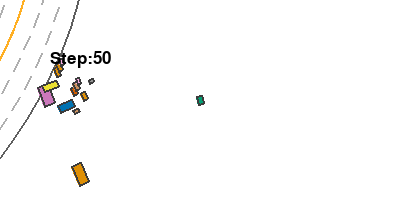

In [3]:
env = SidewalkStaticMetaUrbanEnv(dict(object_density=0.1, log_level=50))
env.reset()
for i in range(100):
    env.step([0,0])
    if i>=50:
        env.render(mode="topdown",
                   window=False,
                   screen_size=(400, 200),
                   screen_record=True,
                   text={"Step": i})
env.top_down_renderer.generate_gif()
print("Before reset the renderer is", env.top_down_renderer)
env.reset()
print("After reset the renderer is", env.top_down_renderer)

env.close()

Image(open("demo.gif", 'rb').read())

## Configs
The `env.render()` accepts parameters like `screen_size`, `window` and so on as input which defines the behavior of the top-down renderer. **Note that these parameters only take effect when you call `env.render` for the first time in one episode.** 

All accepted arguments for creating the top-down renderer are as follows.

In [4]:
from metaurban.engine.top_down_renderer import TopDownRenderer
from metaurban.utils import CONFIG, FUNC_2
print_source(TopDownRenderer.__init__, ["def", "# doc-end"], colorscheme=FUNC_2)

def __init__(
        self,
        film_size=(2000, 2000),  # draw map in size = film_size/scaling. By default, it is set to 400m
        scaling=5,  # None for auto-scale
        screen_size=(800, 800),
        num_stack=15,
        history_smooth=0,
        show_agent_name=False,
        camera_position=None,
        target_agent_heading_up=False,
        target_vehicle_heading_up=None,
        draw_target_vehicle_trajectory=False,
        semantic_map=False,
        semantic_broken_line=True,
        draw_contour=True,
        window=True,
        screen_record=False,
    ):
        """
        Launch a top-down renderer for current episode. Usually, it is launched by env.render(mode="topdown") and will
        be closed when next env.reset() is called or next episode starts.
        Args:
            film_size: The size of the film used to draw the map. The unit is pixel. It should cover the whole map to
            ensure it is complete in the rendered result. It works with the a

## Semantic Top-down View
The top-down view can be changed to semantic view by adding `semantic_map=True` when creating the renderer.

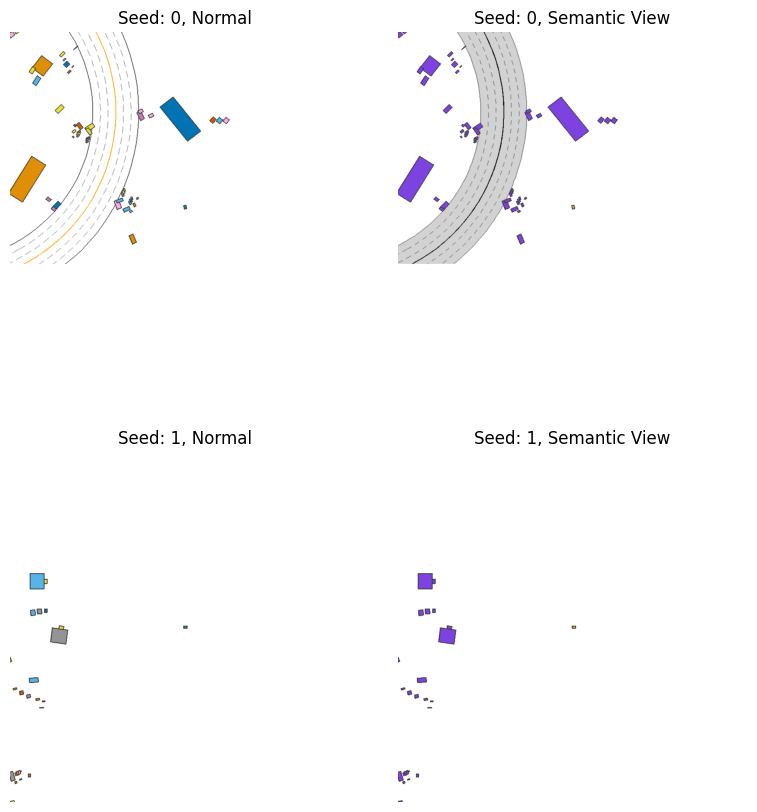

In [5]:
from metaurban.envs import SidewalkStaticMetaUrbanEnv

env = SidewalkStaticMetaUrbanEnv(dict(object_density=0.1,
                        log_level=50, 
                        num_scenarios=2))

env.reset(seed=0)
frame_1 = env.render(mode="topdown", window=False,
                     screen_size=(800, 800), scaling=5)

env.reset(seed=0)
frame_2 = env.render(mode="topdown", window=False,
                     screen_size=(800, 800), scaling=5, semantic_map=True)

env.reset(seed=1)
frame_3 = env.render(mode="topdown", window=False,
                     screen_size=(800, 800), scaling=5)

env.reset(seed=1)
frame_4 = env.render(mode="topdown", window=False,
                     screen_size=(800, 800), scaling=5, semantic_map=True)

env.close()

import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(10, 10)) # You can adjust the figsize as needed
axes[0][0].imshow(frame_1)
axes[0][0].axis('off')  # Turn off axis
axes[0][0].set_title("Seed: 0, Normal")
axes[0][1].imshow(frame_2)
axes[0][1].axis('off')  # Turn off axis
axes[0][1].set_title("Seed: 0, Semantic View")
axes[1][0].imshow(frame_3)
axes[1][0].axis('off')  # Turn off axis
axes[1][0].set_title("Seed: 1, Normal")
axes[1][1].imshow(frame_4)
axes[1][1].axis('off')  # Turn off axis
axes[1][1].set_title("Seed: 1, Semantic View")
plt.subplots_adjust(wspace=0.)
plt.show()